Configuration of the Environment:

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
!git config --global user.email "karhan@uchicago.edu"
!git config --global user.name "karhankaan"

In [ ]:
!pip install torch==1.1.0 torchvision==0.3.0

     |████████████████████████████████| 676.9MB 24kB/s 
     |████████████████████████████████| 2.6MB 10.0MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101


In [ ]:
!pip install git+https://github.com/bruel-gabrielsson/TopologyLayer.git

  Cloning https://github.com/bruel-gabrielsson/TopologyLayer.git to /tmp/pip-req-build-9s8qnoe4
  Running command git clone -q https://github.com/bruel-gabrielsson/TopologyLayer.git /tmp/pip-req-build-9s8qnoe4
  Created wheel for topologylayer: filename=topologylayer-0.0.0-cp37-cp37m-linux_x86_64.whl size=4334677 sha256=545cfa362050c025ba3b9ac6ffaeb2b1a84d3e498f5b98ac707927dc86233a00
  Stored in directory: /tmp/pip-ephem-wheel-cache-13z41k8l/wheels/d1/c7/e0/6aa6867d6cfb17856a6d58263e8ac311db210927b9dc19672e
Successfully built topologylayer


In [ ]:
!pip install dionysus

     |████████████████████████████████| 1.7MB 4.4MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp37-cp37m-linux_x86_64.whl size=322653 sha256=105184681ef1d6cc52fedddff8caa967b883899085a6acfdb2d0b0a2fb2eacb9
  Stored in directory: /root/.cache/pip/wheels/91/a9/4e/dcf72861c267c8445765197025f7a02f887fc8f6b43c9c710c
Successfully built dionysus


In [ ]:
!pip install Pillow==6.1

     |████████████████████████████████| 2.1MB 4.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


Replicating the original results:

using device: cpu
top_batch_cost time:  1.7763829231262207 cost:  tensor(7.9998, grad_fn=<MeanBackward0>)
[Iter 0] [G loss: 7.999762]
top_batch_cost time:  1.857316255569458 cost:  tensor(7.0948, grad_fn=<MeanBackward0>)
[Iter 1] [G loss: 7.094775]
top_batch_cost time:  1.7929129600524902 cost:  tensor(6.4584, grad_fn=<MeanBackward0>)
[Iter 2] [G loss: 6.458398]
top_batch_cost time:  1.8003385066986084 cost:  tensor(6.0195, grad_fn=<MeanBackward0>)
[Iter 3] [G loss: 6.019497]
top_batch_cost time:  1.7726426124572754 cost:  tensor(5.7818, grad_fn=<MeanBackward0>)
[Iter 4] [G loss: 5.781775]
top_batch_cost time:  1.7870967388153076 cost:  tensor(5.5929, grad_fn=<MeanBackward0>)
[Iter 5] [G loss: 5.592918]
top_batch_cost time:  1.784217357635498 cost:  tensor(5.3506, grad_fn=<MeanBackward0>)
[Iter 6] [G loss: 5.350640]
top_batch_cost time:  1.744913101196289 cost:  tensor(5.1626, grad_fn=<MeanBackward0>)
[Iter 7] [G loss: 5.162589]
top_batch_cost time:  1.7667603492736816 cost:  tensor(5.

/usr/local/lib/python3.7/dist-packages/topologylayer/functional/rips_dionysus.py:97: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  intermediate = pts_of_inds[list(index_into_dgms_inds)] - pts_of_inds[list(index_into_dgms_inds_partners)] #- dgms_inds_to_points[np.remainder(np.array(index_into_dgms_inds)+1, 2)]
/usr/local/lib/python3.7/dist-packages/topologylayer/functional/rips_dionysus.py:105: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  grad_output_and_intermediate = (intermediate.transpose() * grad_intermediate[ list(inds_into_grad_out

[Iter 0] [loss: 5.453957]
[Iter 1] [loss: 5.359746]
[Iter 2] [loss: 5.267379]
[Iter 3] [loss: 5.177231]
[Iter 4] [loss: 5.104477]
[Iter 5] [loss: 5.017360]
[Iter 6] [loss: 4.931840]
[Iter 7] [loss: 4.858396]
[Iter 8] [loss: 4.782050]
[Iter 9] [loss: 4.706064]


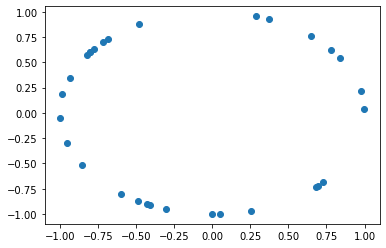

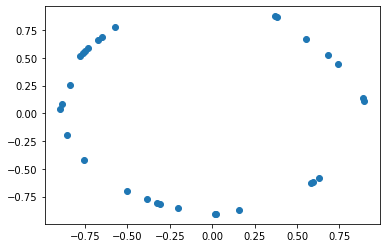

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

''''''
USE_GPU = True
''''''

dtype = torch.float32
if USE_GPU and torch.cuda.is_available():
    map_location = 'cuda'
    device = torch.device(map_location)
else:
    map_location = 'cpu'
    device = torch.device('cpu')
print('using device:', device)

ape = (1, 28, 28)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, int(np.prod(ape))),
            nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *ape)
        return img

def trainToplevel():
    generator = Generator()
    generator.load_state_dict(torch.load('./TopologyLayer/examples/generator/generator-32000.pt', map_location="cpu")) #'./images_post_top/model-1330.pt', map_location="cpu"))

    ''' Diagramlayer Toplevel Setup'''
    dtype=torch.float32
    width, height = 28, 28
    axis_x = np.arange(0, width)
    axis_y = np.arange(0, height)
    grid_axes = np.array(np.meshgrid(axis_x, axis_y))
    grid_axes = np.transpose(grid_axes, (1, 2, 0))
    from scipy.spatial import Delaunay
    tri = Delaunay(grid_axes.reshape([-1, 2]))
    faces = tri.simplices.copy()
    F = DiagramlayerToplevel().init_filtration(faces)
    diagramlayerToplevel = DiagramlayerToplevel.apply
    ''' '''

    z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (28, 100))), requires_grad=True)
    with torch.no_grad():
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_before.png', nrow=5, normalize=False)

    lr = 0.01
    #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
    optimizer = torch.optim.Adam([z], lr=lr)
    for i in range(10):
        optimizer.zero_grad()
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        top_loss = top_batch_cost(gen_image, diagramlayerToplevel, F)
        top_loss.backward()
        optimizer.step()
        print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

    with torch.no_grad():
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_after.png', nrow=5, normalize=False)

def trainRips():
    ''' Rips setup '''
    diagramlayerRips = DiagramlayerRips.apply
    ''' '''

    ''' #### CIRCLE #### '''
    num_samples = 30
    # make a simple unit circle
    theta = np.linspace(0, 2*np.pi, num_samples)
    a, b = 1 * np.cos(theta), 1 * np.sin(theta)
    # generate the points
    theta = np.random.rand((num_samples)) * (2 * np.pi)
    r = 1.0 # np.random.rand((num_samples))
    x, y = r * np.cos(theta), r * np.sin(theta)
    circle = np.array([x,y]).reshape([len(x), 2])
    circle = (circle.T * (1.0 / np.linalg.norm(circle, axis=1))).T
    data = circle
    ''' #### END #### '''

    plt.figure()
    plt.scatter(data[:,0], data[:,1])
    plt.savefig('rips_before.png')

    saturation = 3.0 # Arbitrary
    var = torch.tensor(data, requires_grad=True, dtype=dtype)
    optimizer = torch.optim.Adam([var], lr = 0.01)
    for iter in range(10):
        optimizer.zero_grad()
        diagrams = diagramlayerRips(var, saturation)
        loss = cost_function(diagrams)
        loss.backward()
        optimizer.step()
        print ("[Iter %d] [loss: %f]" % (iter, loss.item()))

    data = var.detach().numpy()
    plt.figure()
    plt.scatter(data[:,0], data[:,1])
    plt.savefig('rips_after.png')

if __name__ == "__main__":
    trainToplevel()
    trainRips()

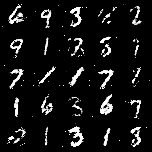

In [ ]:
from IPython.display import Image
Image('toplevel_before.png')

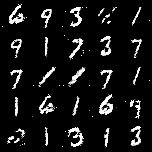

In [ ]:
Image('toplevel_after.png')

In [ ]:
!ls

generator100epochs.pt  images  MNIST.tar.gz    sample_data
generator.pt	       MNIST   MNIST.tar.gz.1


Training DCGAN on MNIST digits:

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)

n_epochs = 20 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
img_size  =32
channels = 1
sample_interval = 400

cuda = True if torch.cuda.is_available() else False


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *discriminator_block(channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1), nn.Sigmoid())

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)

        return validity


# Loss function
adversarial_loss = torch.nn.BCELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Initialize weights
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

# Configure data loader
#os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "./MNIST",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

# ----------
#  Training
# ----------

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(dataloader):

        # Adversarial ground truths
        valid = Variable(Tensor(imgs.shape[0], 1).fill_(1.0), requires_grad=False)
        fake = Variable(Tensor(imgs.shape[0], 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(Tensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim))))

        # Generate a batch of images
        gen_imgs = generator(z)

        # Loss measures generator's ability to fool the discriminator
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Measure discriminator's ability to classify real from generated samples
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            save_image(gen_imgs.data[:25], "images/%d.png" % batches_done, nrow=5, normalize=True) 

torch.save(generator.state_dict(), "./generator20epochs.pt")

0it [00:00, ?it/s]

9920512it [05:05, 31846.60it/s]                             

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


32768it [00:00, 109109.36it/s]           

0it [00:00, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz



 26%|██▋       | 434176/1648877 [00:13<00:38, 31963.99it/s]
9920512it [05:20, 31846.60it/s]
100%|█████████▉| 1646592/1648877 [00:51<00:00, 32024.78it/s]
1654784it [00:51, 29499.06it/s]                             

0it [00:00, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz




8192it [00:00, 36745.24it/s]            


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
[Epoch 0/20] [Batch 0/938] [D loss: 0.693472] [G loss: 0.671156]
[Epoch 0/20] [Batch 1/938] [D loss: 0.693473] [G loss: 0.671831]
[Epoch 0/20] [Batch 2/938] [D loss: 0.693325] [G loss: 0.672859]
[Epoch 0/20] [Batch 3/938] [D loss: 0.693310] [G loss: 0.673465]
[Epoch 0/20] [Batch 4/938] [D loss: 0.693060] [G loss: 0.674130]
[Epoch 0/20] [Batch 5/938] [D loss: 0.693003] [G loss: 0.674839]
[Epoch 0/20] [Batch 6/938] [D loss: 0.692799] [G loss: 0.675503]
[Epoch 0/20] [Batch 7/938] [D loss: 0.692744] [G loss: 0.676075]
[Epoch 0/20] [Batch 8/938] [D loss: 0.692493] [G loss: 0.676762]
[Epoch 0/20] [Batch 9/938] [D loss: 0.692261] [G loss: 0.677262]
[Epoch 0/20] [Batch 10/938] [D loss: 0.692159] [G loss: 0.678039]
[Epoch 0/20] [Batch 11/938] [D loss: 0.691909] [G loss: 0.678413]
[Epoch 0/20] [Batch 12/938] [D loss: 0.691694] [G loss: 0.678629]
[Epoch 0/20] [Batch 13/938] [D loss: 0.691474] [G loss: 0.679055]
[Epoch 0/20


1654784it [01:04, 29499.06it/s]

Streaming output truncated to the last 5000 lines.
[Epoch 14/20] [Batch 628/938] [D loss: 0.572618] [G loss: 1.895831]
[Epoch 14/20] [Batch 629/938] [D loss: 0.483941] [G loss: 1.112328]
[Epoch 14/20] [Batch 630/938] [D loss: 0.519847] [G loss: 0.975548]
[Epoch 14/20] [Batch 631/938] [D loss: 0.575686] [G loss: 0.458559]
[Epoch 14/20] [Batch 632/938] [D loss: 0.567817] [G loss: 0.484871]
[Epoch 14/20] [Batch 633/938] [D loss: 0.550232] [G loss: 0.997896]
[Epoch 14/20] [Batch 634/938] [D loss: 0.653094] [G loss: 0.912169]
[Epoch 14/20] [Batch 635/938] [D loss: 0.386723] [G loss: 1.028745]
[Epoch 14/20] [Batch 636/938] [D loss: 0.540878] [G loss: 1.154218]
[Epoch 14/20] [Batch 637/938] [D loss: 0.479834] [G loss: 1.188184]
[Epoch 14/20] [Batch 638/938] [D loss: 0.669970] [G loss: 0.885789]
[Epoch 14/20] [Batch 639/938] [D loss: 0.626714] [G loss: 1.309323]
[Epoch 14/20] [Batch 640/938] [D loss: 0.619682] [G loss: 0.805748]
[Epoch 14/20] [Batch 641/938] [D loss: 0.497120] [G loss: 1.04648

In [ ]:
!ls 


generator100epochs.pt  generator.pt  MNIST	   MNIST.tar.gz.1
generator20epochs.pt   images	     MNIST.tar.gz  sample_data


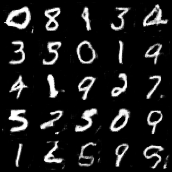

In [ ]:
from IPython.display import Image
Image('./images/90000.png')

In [ ]:
!ls

generator100epochs.pt  generator.pt  images  MNIST  MNIST.tar.gz  sample_data


Minimize Topological Noise and Compare:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

''''''
USE_GPU = True
''''''

dtype = torch.float32
if USE_GPU and torch.cuda.is_available():
    map_location = 'cuda'
    device = torch.device(map_location)
else:
    map_location = 'cpu'
    device = torch.device('cpu')
print('using device:', device)

ape = (1, 28, 28)

n_epochs = 100 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
img_size  =32
channels = 1
sample_interval = 400

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

def trainToplevel():
    generator = Generator()
    generator.load_state_dict(torch.load('./generator20epochs.pt', map_location="cpu")) #'./images_post_top/model-1330.pt', map_location="cpu"))

    ''' Diagramlayer Toplevel Setup'''
    dtype=torch.float32
    width, height = 28, 28
    axis_x = np.arange(0, width)
    axis_y = np.arange(0, height)
    grid_axes = np.array(np.meshgrid(axis_x, axis_y))
    grid_axes = np.transpose(grid_axes, (1, 2, 0))
    from scipy.spatial import Delaunay
    tri = Delaunay(grid_axes.reshape([-1, 2]))
    faces = tri.simplices.copy()
    F = DiagramlayerToplevel().init_filtration(faces)
    diagramlayerToplevel = DiagramlayerToplevel.apply
    ''' '''

    z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (28, 100))), requires_grad=True)
    with torch.no_grad():
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_before.png', nrow=5, normalize=False)

    lr = 0.01
    #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
    optimizer = torch.optim.Adam([z], lr=lr)
    for i in range(10):
        optimizer.zero_grad()
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        top_loss = top_batch_cost(gen_image, diagramlayerToplevel, F)
        top_loss.backward()
        optimizer.step()
        print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

    with torch.no_grad():
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_after.png', nrow=5, normalize=False)

trainToplevel()

using device: cuda
top_batch_cost time:  2.3291919231414795 cost:  tensor(23.1193, grad_fn=<MeanBackward0>)
[Iter 0] [G loss: 23.119280]
top_batch_cost time:  2.3414878845214844 cost:  tensor(21.8315, grad_fn=<MeanBackward0>)
[Iter 1] [G loss: 21.831478]
top_batch_cost time:  2.299992322921753 cost:  tensor(20.6363, grad_fn=<MeanBackward0>)
[Iter 2] [G loss: 20.636290]
top_batch_cost time:  2.4168782234191895 cost:  tensor(19.7369, grad_fn=<MeanBackward0>)
[Iter 3] [G loss: 19.736925]
top_batch_cost time:  2.328991174697876 cost:  tensor(19.0232, grad_fn=<MeanBackward0>)
[Iter 4] [G loss: 19.023172]
top_batch_cost time:  2.2703943252563477 cost:  tensor(18.4284, grad_fn=<MeanBackward0>)
[Iter 5] [G loss: 18.428370]
top_batch_cost time:  2.3070788383483887 cost:  tensor(17.8794, grad_fn=<MeanBackward0>)
[Iter 6] [G loss: 17.879362]
top_batch_cost time:  2.2859859466552734 cost:  tensor(17.3989, grad_fn=<MeanBackward0>)
[Iter 7] [G loss: 17.398884]
top_batch_cost time:  2.347205400466919

In [ ]:
from google.colab import files
files.download("./generator100epochs.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls

sample_data


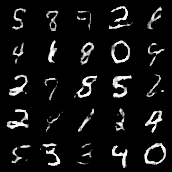

In [ ]:
from IPython.display import Image
Image('toplevel_before.png')


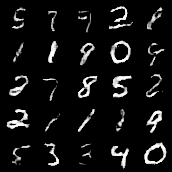

In [ ]:
Image('toplevel_after.png')

Train DCGAN on Fashion MNIST:

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)

n_epochs = 30 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
img_size  =32
channels = 1
sample_interval = 400

cuda = True if torch.cuda.is_available() else False


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *discriminator_block(channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1), nn.Sigmoid())

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)

        return validity


# Loss function
adversarial_loss = torch.nn.BCELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Initialize weights
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

# Configure data loader
#os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        "./FMNIST",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

# ----------
#  Training
# ----------

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(dataloader):

        # Adversarial ground truths
        valid = Variable(Tensor(imgs.shape[0], 1).fill_(1.0), requires_grad=False)
        fake = Variable(Tensor(imgs.shape[0], 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(Tensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim))))

        # Generate a batch of images
        gen_imgs = generator(z)

        # Loss measures generator's ability to fool the discriminator
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Measure discriminator's ability to classify real from generated samples
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            save_image(gen_imgs.data[:25], "images/%d.png" % batches_done, nrow=5, normalize=True) 

torch.save(generator.state_dict(), "./tda/convgenerator50epochs.pt")

Streaming output truncated to the last 5000 lines.
[Epoch 24/30] [Batch 628/938] [D loss: 0.653042] [G loss: 1.486782]
[Epoch 24/30] [Batch 629/938] [D loss: 0.413650] [G loss: 1.113589]
[Epoch 24/30] [Batch 630/938] [D loss: 0.456002] [G loss: 1.034167]
[Epoch 24/30] [Batch 631/938] [D loss: 0.406090] [G loss: 1.435837]
[Epoch 24/30] [Batch 632/938] [D loss: 0.542519] [G loss: 0.825035]
[Epoch 24/30] [Batch 633/938] [D loss: 0.512783] [G loss: 1.026296]
[Epoch 24/30] [Batch 634/938] [D loss: 0.532749] [G loss: 1.405924]
[Epoch 24/30] [Batch 635/938] [D loss: 0.540710] [G loss: 0.720255]
[Epoch 24/30] [Batch 636/938] [D loss: 0.541862] [G loss: 1.129194]
[Epoch 24/30] [Batch 637/938] [D loss: 0.666284] [G loss: 1.082385]
[Epoch 24/30] [Batch 638/938] [D loss: 0.653330] [G loss: 1.163420]
[Epoch 24/30] [Batch 639/938] [D loss: 0.527802] [G loss: 0.714971]
[Epoch 24/30] [Batch 640/938] [D loss: 0.570667] [G loss: 0.963585]
[Epoch 24/30] [Batch 641/938] [D loss: 0.666747] [G loss: 1.64276

In [ ]:
!ls images

0.png	   13600.png  17600.png  21600.png  25600.png  400.png	 800.png
10000.png  14000.png  18000.png  22000.png  26000.png  4400.png  8400.png
10400.png  14400.png  18400.png  22400.png  26400.png  4800.png  8800.png
10800.png  14800.png  18800.png  22800.png  26800.png  5200.png  9200.png
11200.png  15200.png  19200.png  23200.png  27200.png  5600.png  9600.png
11600.png  15600.png  19600.png  23600.png  27600.png  6000.png
12000.png  16000.png  20000.png  24000.png  28000.png  6400.png
1200.png   1600.png   2000.png	 2400.png   2800.png   6800.png
12400.png  16400.png  20400.png  24400.png  3200.png   7200.png
12800.png  16800.png  20800.png  24800.png  3600.png   7600.png
13200.png  17200.png  21200.png  25200.png  4000.png   8000.png


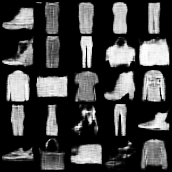

In [ ]:
from IPython.display import Image
Image('./images/28000.png')

In [ ]:
%cd ..

/content


In [ ]:
!git commit -m "convfmnist"
!git push

[master 619fa1c] convfmnist
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 convgenerator50epochs.pt
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 3.71 MiB | 7.02 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/karhankaan/tda
   64868aa..619fa1c  master -> master


Minimize topological noise:

In [ ]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths, PartialSumBarcodeLengths, BarcodePolyFeature
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel


LongTensor = torch.LongTensor

n_epochs = 30 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
img_size  =32
channels = 1
sample_interval = 400

img_shape = (channels, img_size, img_size)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

class TopLoss(nn.Module):
    def __init__(self, size):
        super(TopLoss, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f1(dgminfo) #+ self.zeroholes(dgminfo)


class TopLoss2(nn.Module):
    def __init__(self, size):
        super(TopLoss2, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f2(dgminfo) #+ self.zeroholes(dgminfo)

class TopLoss3(nn.Module):
    def __init__(self, size):
        super(TopLoss3, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.sum = SumBarcodeLengths(dim=0)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.sum(dgminfo) #+ self.zeroholes(dgminfo)

tloss = TopLoss((img_size,img_size))
tloss2 = TopLoss2((img_size,img_size))
tloss3 = TopLoss3((img_size,img_size))

def testloss(toploss, caption):
  generator = Generator()
  generator.load_state_dict(torch.load('./tda/convgenerator50epochs.pt', map_location="cpu"))

  np.random.seed(0)
  z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (28, 100))), requires_grad=True)
  with torch.no_grad():
      gen_image = generator(z)
      save_image(gen_image.data[:25], caption + '_before.png', nrow=5, normalize=False)

  lr = 0.01
  #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
  optimizer = torch.optim.Adam([z], lr=lr)
  for i in range(20):
    for b in range(28):
      optimizer.zero_grad()
      #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
      
      gen_image = generator(z)
      top_loss = toploss(gen_image[b])
      top_loss.backward()
      optimizer.step()
      print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

  with torch.no_grad():
      #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
      gen_image = generator(z)
      save_image(gen_image.data[:25], caption+'_after.png', nrow=5, normalize=False)

testloss(tloss, 'p=0')
testloss(tloss2, 'p=1')
testloss(tloss3, 'sumbarcode')


[Iter 0] [G loss: 4.533721]
[Iter 0] [G loss: 0.131437]
[Iter 0] [G loss: 1.293897]
[Iter 0] [G loss: 0.510569]
[Iter 0] [G loss: 0.383921]
[Iter 0] [G loss: 3.405717]
[Iter 0] [G loss: 0.328985]
[Iter 0] [G loss: 2.409616]
[Iter 0] [G loss: 0.506912]
[Iter 0] [G loss: 2.049961]
[Iter 0] [G loss: 0.869952]
[Iter 0] [G loss: 2.183917]
[Iter 0] [G loss: 1.349053]
[Iter 0] [G loss: 0.205099]
[Iter 0] [G loss: 2.193486]
[Iter 0] [G loss: 0.552946]
[Iter 0] [G loss: 0.701435]
[Iter 0] [G loss: 2.484185]
[Iter 0] [G loss: 0.499002]
[Iter 0] [G loss: 0.254810]
[Iter 0] [G loss: 0.832149]
[Iter 0] [G loss: 0.251202]
[Iter 0] [G loss: 0.336142]
[Iter 0] [G loss: 1.277253]
[Iter 0] [G loss: 0.371273]
[Iter 0] [G loss: 1.410467]
[Iter 0] [G loss: 0.818641]
[Iter 0] [G loss: 2.434320]
[Iter 1] [G loss: 2.979895]
[Iter 1] [G loss: 0.378009]
[Iter 1] [G loss: 0.690572]
[Iter 1] [G loss: 0.342723]
[Iter 1] [G loss: 0.100762]
[Iter 1] [G loss: 0.876674]
[Iter 1] [G loss: 0.155381]
[Iter 1] [G loss: 0.

In [ ]:
!ls

 p0after.png	  'p=1_before.png'	  sumbarcode_before.png
'p=0_before.png'   sample_data		  tda
'p=1_after.png'    sumbarcode_after.png


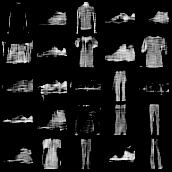

In [ ]:
from IPython.display import Image
Image('./sumbarcode_before.png')

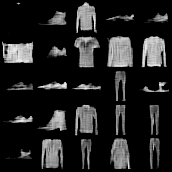

In [ ]:
Image('./sumbarcode_after.png')

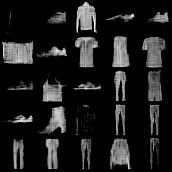

In [ ]:
Image('./p0after.png')

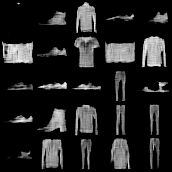

In [ ]:
Image('./p=1_after.png')

Train Conditional GAN on MNIST digits:

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)


n_epochs = 50 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =32
channels = 1
sample_interval = 400


img_shape = (channels, img_size, img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(n_classes, n_classes)

        self.model = nn.Sequential(
            nn.Linear(n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity


# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Configure data loader
#os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "./MNIST",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor


def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, "images/%d.png" % batches_done, nrow=n_row, normalize=True)


# ----------
#  Training
# ----------

for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint(0, n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            sample_image(n_row=10, batches_done=batches_done)

torch.save(generator.state_dict(), "./tda/cgangenerator50_epochs.pt")


0it [00:00, ?it/s]


100%|█████████▉| 9912320/9912422 [05:04<00:00, 31750.64it/s]
9920512it [05:05, 31922.20it/s]                             

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz




32768it [00:00, 440902.32it/s]


0it [00:00, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz




  1%|          | 16384/1648877 [00:00<00:31, 52445.25it/s]

  1%|▏         | 24576/1648877 [00:00<00:36, 44020.54it/s]

  2%|▏         | 32768/1648877 [00:00<00:40, 39480.51it/s]

  2%|▏         | 40960/1648877 [00:01<00:43, 37381.01it/s]

  3%|▎         | 49152/1648877 [00:01<00:44, 35659.80it/s]

  3%|▎         | 57344/1648877 [00:01<00:46, 34484.42it/s]

  4%|▍         | 65536/1648877 [00:01<00:47, 33639.84it/s]

  4%|▍         | 73728/1648877 [00:02<00:47, 32959.78it/s]

  5%|▍         | 81920/1648877 [00:02<00:47, 32824.54it/s]

  5%|▌         | 90112/1648877 [00:02<00:47, 32532.08it/s]

  6%|▌         | 98304/1648877 [00:02<00:47, 32385.43it/s]

  6%|▋         | 106496/1648877 [00:03<00:47, 32201.84it/s]

  7%|▋         | 114688/1648877 [00:03<00:47, 32152.58it/s]

  7%|▋         | 122880/1648877 [00:03<00:47, 32100.90it/s]

  8%|▊         | 131072/1648877 [00:03<00:47, 31999.93it/s]

  8%|▊         | 139264/1648877 [00:04<00:47, 31929.37it/s]

  9%|▉         | 147456/1648877 [

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
[Epoch 0/50] [Batch 0/938] [D loss: 0.505422] [G loss: 1.007920]
[Epoch 0/50] [Batch 1/938] [D loss: 0.252778] [G loss: 0.983786]
[Epoch 0/50] [Batch 2/938] [D loss: 0.081470] [G loss: 0.953519]
[Epoch 0/50] [Batch 3/938] [D loss: 0.010994] [G loss: 0.945209]
[Epoch 0/50] [Batch 4/938] [D loss: 0.039307] [G loss: 0.934128]
[Epoch 0/50] [Batch 5/938] [D loss: 0.013859] [G loss: 0.939816]
[Epoch 0/50] [Batch 6/938] [D loss: 0.015954] [G loss: 0.940382]
[Epoch 0/50] [Batch 7/938] [D loss: 0.012503] [G loss: 0.937076]
[Epoch 0/50] [Batch 8/938] [D loss: 0.013110] [G loss: 0.930646]
[Epoch 0/50] [Batch 9/938] [D loss: 0.012171] [G loss: 0.930052]
[Epoch 0/50] [Batch 10/938] [D loss: 0.007413] [G loss: 0.922862]
[Epoch 0/50] [Batch 11/938] [D loss: 0.010991] [G loss: 0.931270]
[Epoch 0/50] [Batch 12/938] [D loss: 0.011837] [G loss: 0.921837]
[Epoch 0/50] [Batch 13



1654784it [01:04, 29418.34it/s]

Streaming output truncated to the last 5000 lines.
[Epoch 44/50] [Batch 628/938] [D loss: 0.215931] [G loss: 0.293998]
[Epoch 44/50] [Batch 629/938] [D loss: 0.233345] [G loss: 0.240167]
[Epoch 44/50] [Batch 630/938] [D loss: 0.255233] [G loss: 0.296764]
[Epoch 44/50] [Batch 631/938] [D loss: 0.239430] [G loss: 0.265836]
[Epoch 44/50] [Batch 632/938] [D loss: 0.234848] [G loss: 0.282400]
[Epoch 44/50] [Batch 633/938] [D loss: 0.224259] [G loss: 0.295691]
[Epoch 44/50] [Batch 634/938] [D loss: 0.266727] [G loss: 0.278764]
[Epoch 44/50] [Batch 635/938] [D loss: 0.245947] [G loss: 0.316665]
[Epoch 44/50] [Batch 636/938] [D loss: 0.237633] [G loss: 0.279601]
[Epoch 44/50] [Batch 637/938] [D loss: 0.247754] [G loss: 0.244751]
[Epoch 44/50] [Batch 638/938] [D loss: 0.249077] [G loss: 0.295678]
[Epoch 44/50] [Batch 639/938] [D loss: 0.239178] [G loss: 0.284635]
[Epoch 44/50] [Batch 640/938] [D loss: 0.224349] [G loss: 0.245866]
[Epoch 44/50] [Batch 641/938] [D loss: 0.241577] [G loss: 0.27025

In [ ]:
!ls tda

100epoch.png	cgangenerator20_epochs.pt  generator100epochs.pt  README.md
cgan_20_images	cgangenerator50_epochs.pt  generator20epochs.pt


In [ ]:
!ls images

0.png	   1200.png   14800.png  17200.png  3200.png  5600.png	800.png
10000.png  12400.png  15200.png  17600.png  3600.png  6000.png	8400.png
10400.png  12800.png  15600.png  18000.png  4000.png  6400.png	8800.png
10800.png  13200.png  16000.png  18400.png  400.png   6800.png	9200.png
11200.png  13600.png  1600.png	 2000.png   4400.png  7200.png	9600.png
11600.png  14000.png  16400.png  2400.png   4800.png  7600.png
12000.png  14400.png  16800.png  2800.png   5200.png  8000.png


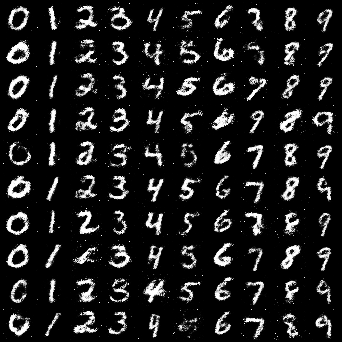

In [ ]:
from IPython.display import Image
Image('./images/18400.png')

Reducing the topological noise using Dionysus API (these results are not in the report):

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

''''''
USE_GPU = True
''''''

dtype = torch.float32
if USE_GPU and torch.cuda.is_available():
    map_location = 'cuda'
    device = torch.device(map_location)
else:
    map_location = 'cpu'
    device = torch.device('cpu')
print('using device:', device)


FloatTensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if torch.cuda.is_available() else torch.LongTensor

ape = (1, 28, 28)

n_epochs = 20 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =32
channels = 1
sample_interval = 400

img_shape = (channels, img_size, img_size)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img

def trainToplevel():
    generator = Generator()
    generator.load_state_dict(torch.load('./tda/cgangenerator20_epochs.pt', map_location="cpu")) #'./images_post_top/model-1330.pt', map_location="cpu"))

    ''' Diagramlayer Toplevel Setup'''
    dtype=torch.float32
    width, height = 28, 28
    axis_x = np.arange(0, width)
    axis_y = np.arange(0, height)
    grid_axes = np.array(np.meshgrid(axis_x, axis_y))
    grid_axes = np.transpose(grid_axes, (1, 2, 0))
    from scipy.spatial import Delaunay
    tri = Delaunay(grid_axes.reshape([-1, 2]))
    faces = tri.simplices.copy()
    F = DiagramlayerToplevel().init_filtration(faces)
    diagramlayerToplevel = DiagramlayerToplevel.apply
    ''' '''

    z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (28, 100))), requires_grad=True)
    with torch.no_grad():
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_before.png', nrow=5, normalize=False)

    lr = 0.01
    #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
    optimizer = torch.optim.Adam([z], lr=lr)
    for i in range(10):
        optimizer.zero_grad()
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        top_loss = top_batch_cost(gen_image, diagramlayerToplevel, F)
        top_loss.backward()
        optimizer.step()
        print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

    with torch.no_grad():
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z)
        save_image(gen_image.data[:25], 'toplevel_after.png', nrow=5, normalize=False)





def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, "./%d.png" % batches_done, nrow=n_row, normalize=True)




generator = Generator()
generator.load_state_dict(torch.load('./tda/cgangenerator20_epochs.pt', map_location="cpu"))
#sample_image(n_row=10, batches_done=0)
#z = Variable(FloatTensor(np.random.normal(0, 1, (28, latent_dim))))
gen_labels = Variable(LongTensor(np.zeros(28)))
z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (28, 100))), requires_grad=False)
with torch.no_grad():
   gen_image = generator(z,gen_labels)
   save_image(gen_image.data[:25], 'next.png', nrow=5, normalize=False)



#trainToplevel()

using device: cpu


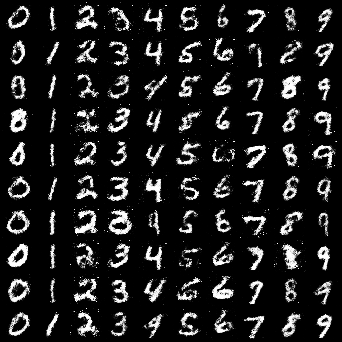

In [ ]:
from IPython.display import Image
Image('0.png')

In [ ]:
!ls 

sample_data


In [ ]:
!git clone https://github.com/karhankaan/tda.git

Cloning into 'tda'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 71 (delta 6), reused 65 (delta 2), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
%cd ..

/content


In [ ]:
!git push origin 

In [ ]:
!ls

sample_data  tda  toplevel_before.png


Using the newer non-Dionysus API to minimize the topological loss:

In [ ]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths, PartialSumBarcodeLengths
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel


n_epochs = 100 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
img_size  =32
channels = 1
sample_interval = 400

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img



class TopLoss(nn.Module):
    def __init__(self, size):
        super(TopLoss, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.topfn = PartialSumBarcodeLengths(dim=0, skip=1) 
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.topfn(dgminfo) #+ self.topfn2(dgminfo)

tloss = TopLoss((32,32)) # topology penalty

generator = Generator()
generator.load_state_dict(torch.load('./tda/generator20epochs.pt', map_location="cpu"))


z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (1, 100))), requires_grad=True)
print(z.size())
with torch.no_grad():
    gen_image = generator(z)
    save_image(gen_image.data[:25], 'toplevel_before.png', nrow=5, normalize=False)

lr = 0.01
#optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer = torch.optim.Adam([z], lr=lr)
for i in range(20):
  #for b in range(28):
    optimizer.zero_grad()
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    gen_image = generator(z)
    print(gen_image.size())
    top_loss = tloss(gen_image)
    top_loss.backward()
    optimizer.step()
    print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

with torch.no_grad():
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    gen_image = generator(z)
    save_image(gen_image.data[:25], 'toplevel_after.png', nrow=5, normalize=False)



torch.Size([1, 100])
torch.Size([1, 1, 32, 32])
[Iter 0] [G loss: 0.316687]
torch.Size([1, 1, 32, 32])
[Iter 1] [G loss: 0.344607]
torch.Size([1, 1, 32, 32])
[Iter 2] [G loss: 0.310558]
torch.Size([1, 1, 32, 32])
[Iter 3] [G loss: 0.229450]
torch.Size([1, 1, 32, 32])
[Iter 4] [G loss: 0.218835]
torch.Size([1, 1, 32, 32])
[Iter 5] [G loss: 0.226626]
torch.Size([1, 1, 32, 32])
[Iter 6] [G loss: 0.228897]
torch.Size([1, 1, 32, 32])
[Iter 7] [G loss: 0.226299]
torch.Size([1, 1, 32, 32])
[Iter 8] [G loss: 0.215241]
torch.Size([1, 1, 32, 32])
[Iter 9] [G loss: 0.211578]
torch.Size([1, 1, 32, 32])
[Iter 10] [G loss: 0.198284]
torch.Size([1, 1, 32, 32])
[Iter 11] [G loss: 0.179372]
torch.Size([1, 1, 32, 32])
[Iter 12] [G loss: 0.171713]
torch.Size([1, 1, 32, 32])
[Iter 13] [G loss: 0.167401]
torch.Size([1, 1, 32, 32])
[Iter 14] [G loss: 0.163722]
torch.Size([1, 1, 32, 32])
[Iter 15] [G loss: 0.163900]
torch.Size([1, 1, 32, 32])
[Iter 16] [G loss: 0.165044]
torch.Size([1, 1, 32, 32])
[Iter 17] 

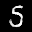

In [ ]:
from IPython.display import Image
Image('toplevel_after.png')

Minimize topological loss for the specialized topological layer:

In [ ]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths, PartialSumBarcodeLengths, BarcodePolyFeature
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel


LongTensor = torch.LongTensor

n_epochs = 20 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =32
channels = 1
sample_interval = 400

img_shape = (channels, img_size, img_size)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class TopLoss(nn.Module):
    def __init__(self, size):
        super(TopLoss, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(1,2,0)
        self.hmm = SumBarcodeLengths(dim=1)
        self.hmm2 = SumBarcodeLengths(dim=0)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta, label):
        dgminfo = self.pdfn(beta)
        if label == 0:
          return self.comp(dgminfo) + self.onehole(dgminfo)
        elif label == 1:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 2:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 3:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 4:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 5:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 6:
          return self.comp(dgminfo) + self.onehole(dgminfo)
        elif label == 7:
          return self.comp(dgminfo) + self.zeroholes(dgminfo)
        elif label == 8:
          return self.comp(dgminfo) + self.twoholes(dgminfo)
        elif label == 9:
          return self.comp(dgminfo) + self.onehole(dgminfo)


class TopLoss2(nn.Module):
    def __init__(self, size):
        super(TopLoss2, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta, label):
        dgminfo = self.pdfn(beta)
        return self.f1(dgminfo)


tloss = TopLoss((32,32)) # topology penalty
tloss2 = TopLoss2((32,32))

generator = Generator()
generator.load_state_dict(torch.load('./tda/cgangenerator50_epochs.pt', map_location="cpu"))

plainlabels = [num for num in range(0,10)] + [num for num in range(0,10)] + [num for num in range(0,5)]
np.random.seed(0)
#z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (10, latent_dim))), requires_grad=True)
z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (25, latent_dim))), requires_grad=True)
label = Variable(LongTensor(np.array(plainlabels)))
print(z.size())
with torch.no_grad():
    gen_image = generator(z, label)
    save_image(gen_image.data[:25], 'toplevel_before_specialized.png', nrow=5, normalize=False)

lr = 0.01
#optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer = torch.optim.Adam([z], lr=lr)
for i in range(20):
  for b in range(25):
    optimizer.zero_grad()
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    
    gen_image = generator(z, label)
    top_loss = tloss(gen_image[b], plainlabels[b])
    top_loss.backward()
    optimizer.step()
    print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

with torch.no_grad():
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    gen_image = generator(z, label)
    save_image(gen_image.data[:25], 'toplevel_after_specialized.png', nrow=5, normalize=False)


torch.Size([25, 100])
[Iter 0] [G loss: 4.829161]
[Iter 0] [G loss: 0.376782]
[Iter 0] [G loss: 13.434345]
[Iter 0] [G loss: 9.532733]
[Iter 0] [G loss: 5.897986]
[Iter 0] [G loss: 5.494160]
[Iter 0] [G loss: 4.372943]
[Iter 0] [G loss: 1.499042]
[Iter 0] [G loss: 2.866129]
[Iter 0] [G loss: 11.395773]
[Iter 0] [G loss: 1.189424]
[Iter 0] [G loss: 1.273715]
[Iter 0] [G loss: 12.902323]
[Iter 0] [G loss: 4.239103]
[Iter 0] [G loss: 3.430014]
[Iter 0] [G loss: 2.242244]
[Iter 0] [G loss: 2.724317]
[Iter 0] [G loss: 1.774186]
[Iter 0] [G loss: 6.148239]
[Iter 0] [G loss: 10.994675]
[Iter 0] [G loss: 9.204980]
[Iter 0] [G loss: 2.837317]
[Iter 0] [G loss: 11.585514]
[Iter 0] [G loss: 5.360135]
[Iter 0] [G loss: 3.903920]
[Iter 1] [G loss: 1.855453]
[Iter 1] [G loss: 0.283830]
[Iter 1] [G loss: 10.858144]
[Iter 1] [G loss: 5.269639]
[Iter 1] [G loss: 5.500269]
[Iter 1] [G loss: 3.872554]
[Iter 1] [G loss: 1.365236]
[Iter 1] [G loss: 0.643563]
[Iter 1] [G loss: 1.279146]
[Iter 1] [G loss: 8.

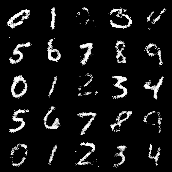

In [ ]:
from IPython.display import Image
Image('toplevel_before_specialized.png')

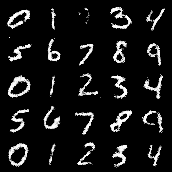

In [ ]:
from IPython.display import Image
Image('toplevel_after_specialized.png')

In [ ]:
tloss2 = TopLoss2((32,32))

generator = Generator()
generator.load_state_dict(torch.load('./tda/cgangenerator50_epochs.pt', map_location="cpu"))

plainlabels = [num for num in range(0,10)] + [num for num in range(0,10)] + [num for num in range(0,5)]
np.random.seed(0)
#z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (10, latent_dim))), requires_grad=True)
z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (25, latent_dim))), requires_grad=True)
label = Variable(LongTensor(np.array(plainlabels)))
print(z.size())
with torch.no_grad():
    gen_image = generator(z, label)
    save_image(gen_image.data[:25], 'toplevel_before.png', nrow=5, normalize=False)

lr = 0.01
#optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer = torch.optim.Adam([z], lr=lr)
for i in range(20):
  for b in range(25):
    optimizer.zero_grad()
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    
    gen_image = generator(z, label)
    top_loss = tloss2(gen_image[b], plainlabels[b])
    top_loss.backward()
    optimizer.step()
    print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

with torch.no_grad():
    #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
    gen_image = generator(z, label)
    save_image(gen_image.data[:25], 'toplevel_after.png', nrow=5, normalize=False)

torch.Size([25, 100])
[Iter 0] [G loss: 0.986904]
[Iter 0] [G loss: 0.119658]
[Iter 0] [G loss: 14.500158]
[Iter 0] [G loss: 6.148793]
[Iter 0] [G loss: 7.035069]
[Iter 0] [G loss: 5.408731]
[Iter 0] [G loss: 2.982533]
[Iter 0] [G loss: 0.666490]
[Iter 0] [G loss: 1.212497]
[Iter 0] [G loss: 9.071965]
[Iter 0] [G loss: 0.047972]
[Iter 0] [G loss: 0.640181]
[Iter 0] [G loss: 10.241141]
[Iter 0] [G loss: 1.375291]
[Iter 0] [G loss: 0.926186]
[Iter 0] [G loss: 1.209694]
[Iter 0] [G loss: 0.604038]
[Iter 0] [G loss: 0.356868]
[Iter 0] [G loss: 2.550560]
[Iter 0] [G loss: 8.161430]
[Iter 0] [G loss: 5.047308]
[Iter 0] [G loss: 0.599885]
[Iter 0] [G loss: 13.267000]
[Iter 0] [G loss: 1.943869]
[Iter 0] [G loss: 0.834510]
[Iter 1] [G loss: 0.268071]
[Iter 1] [G loss: 0.527422]
[Iter 1] [G loss: 10.070772]
[Iter 1] [G loss: 2.766391]
[Iter 1] [G loss: 4.142913]
[Iter 1] [G loss: 4.583589]
[Iter 1] [G loss: 0.603054]
[Iter 1] [G loss: 0.348084]
[Iter 1] [G loss: 0.431450]
[Iter 1] [G loss: 4.48

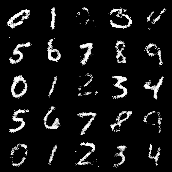

In [ ]:
from IPython.display import Image
Image('toplevel_before.png')

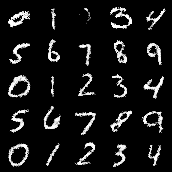

In [ ]:
from IPython.display import Image
Image('toplevel_after.png')

In [ ]:
!ls

FMNIST	images	sample_data


Train conditional GAN on Fashion MNIST:

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)


n_epochs = 50 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =28
channels = 1
sample_interval = 400


img_shape = (channels, img_size, img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(n_classes, n_classes)

        self.model = nn.Sequential(
            nn.Linear(n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity


# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Configure data loader
#os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        "./FMNIST",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor


def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, "images/%d.png" % batches_done, nrow=n_row, normalize=True)


# ----------
#  Training
# ----------

for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint(0, n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            sample_image(n_row=10, batches_done=batches_done)

torch.save(generator.state_dict(), "./tda/fmnistcgan50_epochs.pt")

Streaming output truncated to the last 5000 lines.
[Epoch 44/50] [Batch 628/938] [D loss: 0.206903] [G loss: 0.388079]
[Epoch 44/50] [Batch 629/938] [D loss: 0.198049] [G loss: 0.388449]
[Epoch 44/50] [Batch 630/938] [D loss: 0.215699] [G loss: 0.318839]
[Epoch 44/50] [Batch 631/938] [D loss: 0.222521] [G loss: 0.346114]
[Epoch 44/50] [Batch 632/938] [D loss: 0.222371] [G loss: 0.310891]
[Epoch 44/50] [Batch 633/938] [D loss: 0.204710] [G loss: 0.332862]
[Epoch 44/50] [Batch 634/938] [D loss: 0.214035] [G loss: 0.420178]
[Epoch 44/50] [Batch 635/938] [D loss: 0.213330] [G loss: 0.349206]
[Epoch 44/50] [Batch 636/938] [D loss: 0.205247] [G loss: 0.301145]
[Epoch 44/50] [Batch 637/938] [D loss: 0.192637] [G loss: 0.383055]
[Epoch 44/50] [Batch 638/938] [D loss: 0.225125] [G loss: 0.420542]
[Epoch 44/50] [Batch 639/938] [D loss: 0.206788] [G loss: 0.296803]
[Epoch 44/50] [Batch 640/938] [D loss: 0.201012] [G loss: 0.330309]
[Epoch 44/50] [Batch 641/938] [D loss: 0.219988] [G loss: 0.33418

In [ ]:
!ls

FMNIST	images	sample_data  tda


Try out different topological layers:

In [ ]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths, PartialSumBarcodeLengths, BarcodePolyFeature
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel


LongTensor = torch.LongTensor

n_epochs = 20 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =28
channels = 1
sample_interval = 400

img_shape = (channels, img_size, img_size)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img



class TopLoss(nn.Module):
    def __init__(self, size):
        super(TopLoss, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f1(dgminfo) #+ self.zeroholes(dgminfo)


class TopLoss2(nn.Module):
    def __init__(self, size):
        super(TopLoss2, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f2(dgminfo) #+ self.zeroholes(dgminfo)

class TopLoss3(nn.Module):
    def __init__(self, size):
        super(TopLoss3, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.sm = SumBarcodeLengths(dim=0)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.sm(dgminfo) #+ self.zeroholes(dgminfo)

tloss1 = TopLoss((img_size,img_size))
tloss2 = TopLoss2((img_size,img_size))
tloss3 = TopLoss3((img_size,img_size))


def testloss(toploss, caption):
  generator = Generator()
  generator.load_state_dict(torch.load('./tda/fmnistcgan50_epochs.pt', map_location="cpu"))

  plainlabels = [num for num in range(0,10)] + [num for num in range(0,10)]+[num for num in range(0,5)]
  np.random.seed(0)
  z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (25, latent_dim))), requires_grad=True)
  label = Variable(LongTensor(np.array(plainlabels)))
  with torch.no_grad():
      gen_image = generator(z, label)
      save_image(gen_image.data[:25], caption+'before.png', nrow=5, normalize=False)

  lr = 0.01
  #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
  optimizer = torch.optim.Adam([z], lr=lr)
  for i in range(20):
    for b in range(25):
      optimizer.zero_grad()
      #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
      
      gen_image = generator(z, label)
      top_loss = toploss(gen_image[b])
      top_loss.backward()
      optimizer.step()
      print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

  with torch.no_grad():
      #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
      gen_image = generator(z, label)
      save_image(gen_image.data[:25], caption+'after.png', nrow=5, normalize=False)

testloss(tloss1, "p2")
testloss(tloss2, "p1")
testloss(tloss3, "barcodesum")


[Iter 0] [G loss: 3.104351]
[Iter 0] [G loss: 3.449639]
[Iter 0] [G loss: 3.991890]
[Iter 0] [G loss: 2.750230]
[Iter 0] [G loss: 3.800497]
[Iter 0] [G loss: 16.427660]
[Iter 0] [G loss: 9.067372]
[Iter 0] [G loss: 3.641934]
[Iter 0] [G loss: 1.228512]
[Iter 0] [G loss: 8.957690]
[Iter 0] [G loss: 6.684552]
[Iter 0] [G loss: 0.271349]
[Iter 0] [G loss: 0.948503]
[Iter 0] [G loss: 0.642589]
[Iter 0] [G loss: 12.476534]
[Iter 0] [G loss: 8.145314]
[Iter 0] [G loss: 16.815046]
[Iter 0] [G loss: 5.603992]
[Iter 0] [G loss: 8.278949]
[Iter 0] [G loss: 15.467799]
[Iter 0] [G loss: 20.826162]
[Iter 0] [G loss: 3.615235]
[Iter 0] [G loss: 9.971445]
[Iter 0] [G loss: 15.449349]
[Iter 0] [G loss: 10.822954]
[Iter 1] [G loss: 0.650034]
[Iter 1] [G loss: 1.820120]
[Iter 1] [G loss: 3.603189]
[Iter 1] [G loss: 1.468478]
[Iter 1] [G loss: 1.060035]
[Iter 1] [G loss: 12.430140]
[Iter 1] [G loss: 7.424525]
[Iter 1] [G loss: 1.757535]
[Iter 1] [G loss: 0.865946]
[Iter 1] [G loss: 5.706823]
[Iter 1] [G 

In [ ]:
!ls

barcodesumafter.png   p2after.png   toplevel_after.png
barcodesumbefore.png  p2before.png  toplevel_after_specialized.png
p1after.png	      sample_data   toplevel_before.png
p1before.png	      tda	    toplevel_before_specialized.png


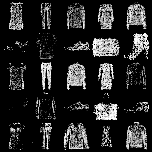

In [ ]:
from IPython.display import Image
Image('barcodesumbefore.png')

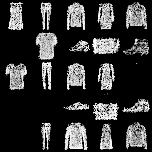

In [ ]:
from IPython.display import Image
Image('barcodesumafter.png')

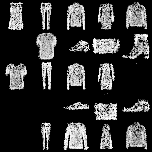

In [ ]:
Image('p1after.png')

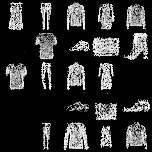

In [ ]:
Image('p2after.png')

In [ ]:
!ls


100epoch.png		   FMNIST		   images
cgan_20_images		   fmnistcgan50_epochs.pt  README.md
cgangenerator20_epochs.pt  generator100epochs.pt
cgangenerator50_epochs.pt  generator20epochs.pt


In [ ]:
%cd ..

/content


In [ ]:
!git add fmnistcgan50_epochs.pt

In [ ]:
!git commit -m "fmnist"

[master bae4770] fmnist
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 fmnistcgan50_epochs.pt


In [ ]:
!git push

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 5.37 MiB | 7.50 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/karhankaan/tda
   2331832..bae4770  master -> master


In [ ]:
!ls images

0.png	   16000.png  22000.png  2800.png   34400.png  400.png	  46400.png
10000.png  1600.png   22400.png  28400.png  34800.png  40400.png  46800.png
10400.png  16400.png  22800.png  28800.png  35200.png  40800.png  4800.png
10800.png  16800.png  23200.png  29200.png  35600.png  41200.png  5200.png
11200.png  17200.png  23600.png  29600.png  36000.png  41600.png  5600.png
11600.png  17600.png  24000.png  30000.png  3600.png   42000.png  6000.png
12000.png  18000.png  2400.png	 30400.png  36400.png  42400.png  6400.png
1200.png   18400.png  24400.png  30800.png  36800.png  42800.png  6800.png
12400.png  18800.png  24800.png  31200.png  37200.png  43200.png  7200.png
12800.png  19200.png  25200.png  31600.png  37600.png  43600.png  7600.png
13200.png  19600.png  25600.png  32000.png  38000.png  44000.png  8000.png
13600.png  20000.png  26000.png  3200.png   38400.png  4400.png   800.png
14000.png  2000.png   26400.png  32400.png  38800.png  44400.png  8400.png
14400.png  20400.png  26800.

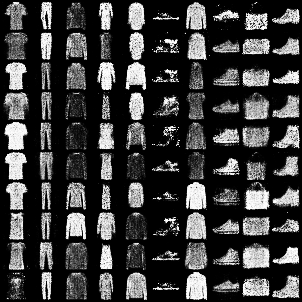

In [ ]:
Image('images/46000.png')

FMNIST	sample_data  toplevel_after_specialized.png
images	tda	     toplevel_before_specialized.png


Train on CIFAR:

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)


n_epochs = 80 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =32
channels = 3
sample_interval = 400

img_shape = (channels, img_size, img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(n_classes, n_classes)

        self.model = nn.Sequential(
            nn.Linear(n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity


# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

# Configure data loader
#os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.CIFAR10(
        "./CIFAR",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor


def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, "images/%d.png" % batches_done, nrow=n_row, normalize=True)


# ----------
#  Training
# ----------

for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint(0, n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % sample_interval == 0:
            sample_image(n_row=10, batches_done=batches_done)

torch.save(generator.state_dict(), "./tda/CIFARgenerator150_epochs.pt")


Files already downloaded and verified
[Epoch 0/150] [Batch 0/782] [D loss: 0.548960] [G loss: 1.093097]
[Epoch 0/150] [Batch 1/782] [D loss: 0.462558] [G loss: 1.066271]
[Epoch 0/150] [Batch 2/782] [D loss: 0.353706] [G loss: 1.043249]
[Epoch 0/150] [Batch 3/782] [D loss: 0.269964] [G loss: 1.017255]
[Epoch 0/150] [Batch 4/782] [D loss: 0.156967] [G loss: 0.979665]
[Epoch 0/150] [Batch 5/782] [D loss: 0.163323] [G loss: 0.954768]
[Epoch 0/150] [Batch 6/782] [D loss: 0.107566] [G loss: 0.929359]
[Epoch 0/150] [Batch 7/782] [D loss: 0.112648] [G loss: 0.917681]
[Epoch 0/150] [Batch 8/782] [D loss: 0.086515] [G loss: 0.909704]
[Epoch 0/150] [Batch 9/782] [D loss: 0.083263] [G loss: 0.889096]
[Epoch 0/150] [Batch 10/782] [D loss: 0.077575] [G loss: 0.870896]
[Epoch 0/150] [Batch 11/782] [D loss: 0.075148] [G loss: 0.830612]
[Epoch 0/150] [Batch 12/782] [D loss: 0.066321] [G loss: 0.806856]
[Epoch 0/150] [Batch 13/782] [D loss: 0.092863] [G loss: 0.779524]
[Epoch 0/150] [Batch 14/782] [D lo

KeyboardInterrupt: ignored

In [ ]:
!ls tda

100epoch.png		   CIFARcgan50_epochs.pt       generator20epochs.pt
cgan_20_images		   CIFARgenerator50_epochs.pt  README.md
cgangenerator20_epochs.pt  fmnistcgan50_epochs.pt
cgangenerator50_epochs.pt  generator100epochs.pt


In [ ]:
%cd tda

/content/tda


In [ ]:
!git add CIFARgenerator50_epochs.pt

In [ ]:
!git commit -m "cifar"

[master 64868aa] cifar
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 CIFARgenerator50_epochs.pt


In [ ]:
!git push

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 13.66 MiB | 10.44 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/karhankaan/tda
   bae4770..64868aa  master -> master


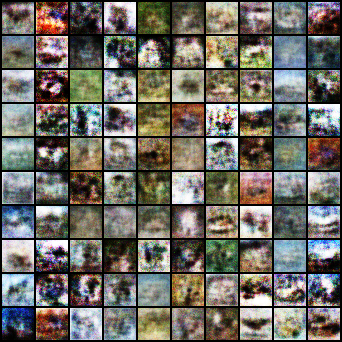

In [ ]:
from IPython.display import Image
Image('images/62400.png')

Topological Layer on CIFAR:

In [ ]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths, PartialSumBarcodeLengths, BarcodePolyFeature
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision.utils import save_image
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import os
from topologylayer.functional.utils_dionysus import *
from topologylayer.functional.rips_dionysus import Diagramlayer as DiagramlayerRips
from topologylayer.functional.levelset_dionysus import Diagramlayer as DiagramlayerToplevel


LongTensor = torch.LongTensor

n_epochs = 80 #200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
#n_cpu = 8
latent_dim = 100
n_classes = 10
img_size  =32
channels = 3
sample_interval = 400

img_shape = (channels, img_size, img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim + n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img




class TopLoss(nn.Module):
    def __init__(self, size):
        super(TopLoss, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f1(dgminfo) #+ self.zeroholes(dgminfo)


class TopLoss2(nn.Module):
    def __init__(self, size):
        super(TopLoss2, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.hmm = SumBarcodeLengths(dim=1)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.f2(dgminfo) #+ self.zeroholes(dgminfo)

class TopLoss3(nn.Module):
    def __init__(self, size):
        super(TopLoss3, self).__init__()
        self.pdfn = LevelSetLayer2D(size=size,  sublevel=False)
        self.comp = PartialSumBarcodeLengths(dim=0, skip=1) # 1 connected component
        self.zeroholes = PartialSumBarcodeLengths(dim=1, skip=0) 
        self.onehole = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.twoholes = PartialSumBarcodeLengths(dim=1, skip=2) 
        self.top1 = PartialSumBarcodeLengths(dim=1, skip=1) 
        self.f1 = BarcodePolyFeature(0,2,0)
        self.f2 = BarcodePolyFeature(0,1,0)
        self.sm = SumBarcodeLengths(dim=0)
       # self.topfn2 = SumBarcodeLengths(dim=0) # penalize more than 1 max

    def forward(self, beta):
        dgminfo = self.pdfn(beta)
        return self.sm(dgminfo) #+ self.zeroholes(dgminfo)

tloss1 = TopLoss((img_size,img_size))
tloss2 = TopLoss2((img_size,img_size))
tloss3 = TopLoss3((img_size,img_size))


def testloss(toploss, caption):
  generator = Generator()
  generator.load_state_dict(torch.load('./tda/CIFARgenerator50_epochs.pt', map_location="cpu"))

  plainlabels = [num for num in range(0,10)] + [num for num in range(0,10)]+[num for num in range(0,5)]
  np.random.seed(0)
  z = torch.autograd.Variable(torch.Tensor(np.random.normal(0, 1, (25, latent_dim))), requires_grad=True)
  label = Variable(LongTensor(np.array(plainlabels)))
  with torch.no_grad():
      gen_image = generator(z, label)
      save_image(gen_image.data[:25], caption+'before.png', nrow=5, normalize=False)

  lr = 0.01
  #optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
  optimizer = torch.optim.Adam([z], lr=lr)
  for i in range(20):
    for b in range(25):
      for c in range(3):
        optimizer.zero_grad()
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        
        gen_image = generator(z, label)
        top_loss = toploss(gen_image[b,c])
        top_loss.backward()
        optimizer.step()
        print ("[Iter %d] [G loss: %f]" % (i, top_loss.item()))

    with torch.no_grad():
        #z = torch.Tensor(np.random.normal(0, 1, (28, 100)))
        gen_image = generator(z, label)
        save_image(gen_image.data[:25], caption+'after.png', nrow=5, normalize=False)

testloss(tloss1, "p2")
testloss(tloss2, "p1")
testloss(tloss3, "barcodesum")


[Iter 0] [G loss: 4.716515]
[Iter 0] [G loss: 3.222133]
[Iter 0] [G loss: 3.190209]
[Iter 0] [G loss: 13.618161]
[Iter 0] [G loss: 15.533616]
[Iter 0] [G loss: 12.841386]
[Iter 0] [G loss: 5.077080]
[Iter 0] [G loss: 7.913738]
[Iter 0] [G loss: 8.804693]
[Iter 0] [G loss: 10.886119]
[Iter 0] [G loss: 12.632425]
[Iter 0] [G loss: 12.148885]
[Iter 0] [G loss: 1.952565]
[Iter 0] [G loss: 1.968557]
[Iter 0] [G loss: 2.478863]
[Iter 0] [G loss: 5.386872]
[Iter 0] [G loss: 6.090393]
[Iter 0] [G loss: 6.387940]
[Iter 0] [G loss: 1.343621]
[Iter 0] [G loss: 2.129882]
[Iter 0] [G loss: 2.277398]
[Iter 0] [G loss: 4.767964]
[Iter 0] [G loss: 5.164833]
[Iter 0] [G loss: 2.940147]
[Iter 0] [G loss: 2.550510]
[Iter 0] [G loss: 2.412572]
[Iter 0] [G loss: 1.962658]
[Iter 0] [G loss: 1.990868]
[Iter 0] [G loss: 2.568634]
[Iter 0] [G loss: 4.186948]
[Iter 0] [G loss: 2.448295]
[Iter 0] [G loss: 2.063462]
[Iter 0] [G loss: 1.547618]
[Iter 0] [G loss: 11.449697]
[Iter 0] [G loss: 11.391902]
[Iter 0] [G 

In [ ]:
!ls 

barcodesumafter.png   CIFAR   p1after.png   p2after.png   sample_data
barcodesumbefore.png  images  p1before.png  p2before.png  tda


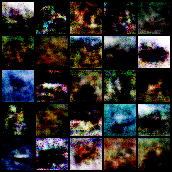

In [ ]:
from IPython.display import Image
Image('barcodesumbefore.png')

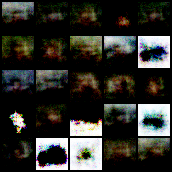

In [ ]:
Image('barcodesumafter.png')

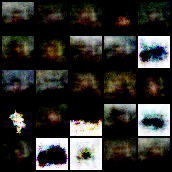

In [ ]:
Image('p1after.png')

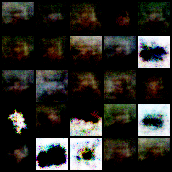

In [ ]:
Image('p2after.png')